In [1]:
import pandas as pd

# Load the modified dataset
modified_data = pd.read_excel('modified_data_with_imputation_and_log.xlsx')

# Display the first few rows of the dataset
print(modified_data.head())


  REF_DATE     GEO           DGUID  \
0  2017-01  Canada  2016A000011124   
1  2017-01  Canada  2016A000011124   
2  2017-01  Canada  2016A000011124   
3  2017-01  Canada  2016A000011124   
4  2017-01  Canada  2016A000011124   

  North American Industry Classification System (NAICS)  Seasonally Adjusted  \
0                               Retail trade [44-45]              50417235.0   
1                               Retail trade [44-45]              50417235.0   
2                               Retail trade [44-45]               1236885.0   
3                               Retail trade [44-45]               1236885.0   
4              Motor vehicle and parts dealers [441]              13561527.0   

   Unadjusted  Log_Seasonally_Adjusted  Imputed_Seasonally_Adjusted  \
0    41377009                17.735844                   50417235.0   
1     1110045                17.735844                   50417235.0   
2    41377009                14.028107                    1236885.0   
3     

Mean Absolute Error: 893.0818789216605
Mean Squared Error: 128579089.88780956
R-squared: 0.9999916036141117


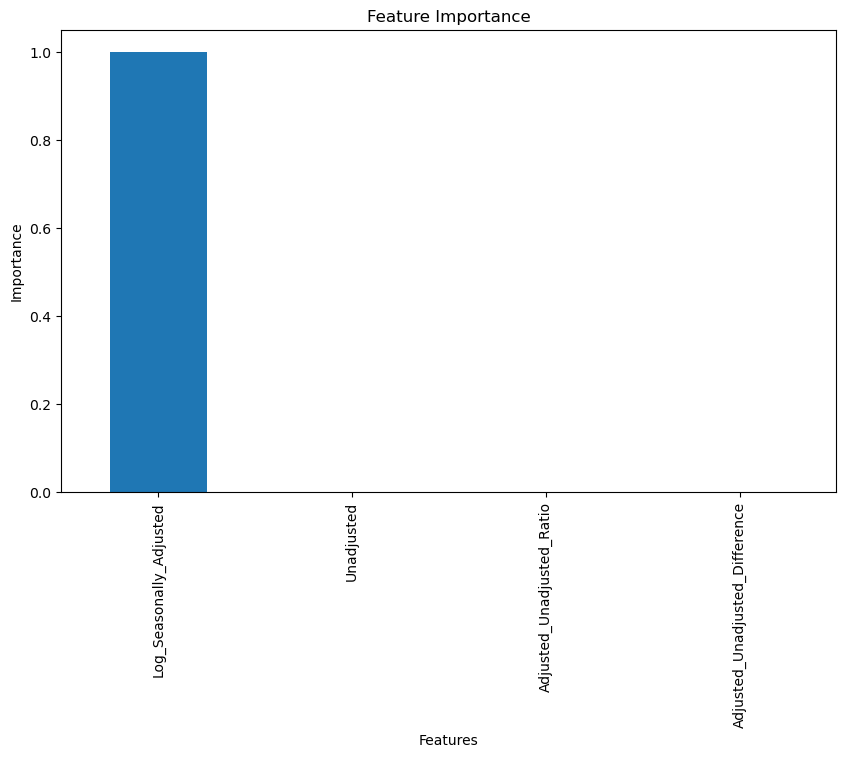

Feature Importances:
Log_Seasonally_Adjusted           0.999949
Unadjusted                        0.000025
Adjusted_Unadjusted_Ratio         0.000015
Adjusted_Unadjusted_Difference    0.000011
dtype: float64


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
modified_data = pd.read_excel('modified_data_with_imputation_and_log.xlsx')

# Drop non-numeric columns that are not relevant for prediction
X = modified_data.drop(columns=['Imputed_Seasonally_Adjusted', 'Seasonally Adjusted', 'REF_DATE', 'GEO', 'DGUID', 'North American Industry Classification System (NAICS)'])

# Target variable
y = modified_data['Imputed_Seasonally_Adjusted']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

# Print feature importances
print("Feature Importances:")
print(feature_importance)
